In [1]:
import pandas as pd  
import numpy as np 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
# required libraries are imported 

In [2]:
data = pd.read_csv('Obesity prediction.csv')

In [3]:
print(" Dataset overview:")
print(data.info()) 
# Summary of the dataset in printed

 Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8),

In [4]:
print(" First few rows of the dataset:")
print(data.head())

 First few rows of the dataset:
   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3 

In [5]:
if data.isnull().sum().any():
    print(" Missing values found. Filling them with median values")
    data.fillna(data.median(), inplace=True)  # If any missing values are found,it's replaced with median values
else:
    print(" No missing values detected")

 No missing values detected


In [6]:
data = pd.get_dummies(data, drop_first=True)
#This function performs one-hot-encoding on categorical variables,converting them into a binary format

In [7]:
target_columns = ['Obesity_Normal_Weight', 
                  'Obesity_Obesity_Type_I', 
                  'Obesity_Obesity_Type_II', 
                  'Obesity_Obesity_Type_III', 
                  'Obesity_Overweight_Level_I', 
                  'Obesity_Overweight_Level_II']
X = data.drop(columns=target_columns)
y = data[target_columns]
# X provides the input data for training the model.
# y provides the expected output (obesity levels) that the model learns to predict.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# This splits the dataset into 80% for training and 20% for testing

In [9]:
model = RandomForestClassifier(n_estimators=150, random_state=0, max_depth=10) 
model.fit(X_train, y_train)
# Random Forest model is trained with 150 trees and maximum depth of 10

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=0)

In [10]:
predictions = model.predict(X_test)
# Predictions are made on the test set

In [11]:
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
# accuracy of the model is calculated

print("\nClassification Report:")
print(classification_report(y_test, predictions,zero_division=1))
# detailed classification report including precision, recall, F1-score and support is displayed

# one-hot encoded target values and predictions are converted into single labels by selecting the index of the maximum value
y_test_single = np.argmax(y_test.values, axis=1) 
predictions_single = np.argmax(predictions, axis=1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_single, predictions_single))
# confusion matrix is generated

Evaluation Metrics:
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        57
           1       1.00      0.91      0.95        67
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        69
           4       0.98      0.70      0.82        57
           5       1.00      0.65      0.79        55

   micro avg       0.97      0.85      0.90       358
   macro avg       0.97      0.84      0.89       358
weighted avg       0.97      0.85      0.90       358
 samples avg       0.98      0.87      0.86       358


Confusion Matrix:
[[122   0   0   0   0   0]
 [  6  61   0   0   0   0]
 [  1   0  52   0   0   0]
 [  0   0   0  69   0   0]
 [ 17   0   0   0  40   0]
 [ 18   0   0   0   1  36]]


Analyzing feature importance

Top factors influencing obesity levels:
       Feature  Importance
2       Weight    0.299077
0          Age    0.099770
3         FCVC    0.094860
1       Height    0.094545
8  Gender_Male    0.060024


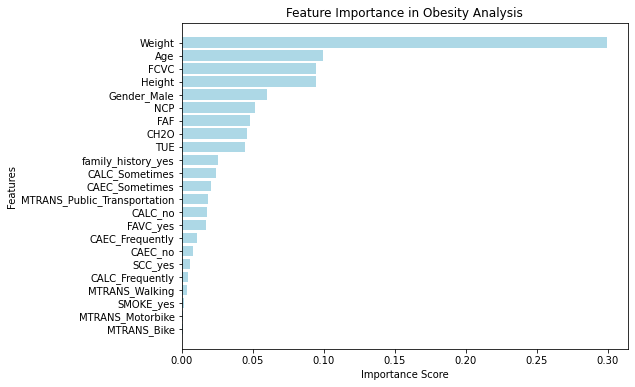

In [12]:
print("Analyzing feature importance")
feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

print("\nTop factors influencing obesity levels:")
print(feature_importances.head())


plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='lightblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Obesity Analysis')
plt.gca().invert_yaxis()
plt.show()
# Visualization of feature importance is done and the top factors influencing obesity level is displayed 